<a href="https://colab.research.google.com/github/astrodatos/proyecto_aape/blob/master/RegressionQuasar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table
import pandas as pd
import numpy as np

filename = ('/content/gdrive/My Drive/Colab Notebooks/dr9q_fit.fits')
hdu_fits = fits.open(filename)
hdu = fits.open(filename)[1]
header = hdu.header
wcs = WCS(header)
print (wcs)

data=hdu.data
print (data)

In [0]:
table=Table.read(hdu_fits)
#table.colnames
table

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
QuasarTable = table['Z_VI','LOGF_CIV', 'LOGF_CIII', 'LOGF_ALIII', 'LOGF_SIIII', 
                    'LOGF_MGII','LOGF_BROAD_HB','LOGF_NARROW_HB','LOGF_OIII_5007']
QuasarTable['class']='QUASAR'
QuasarTable

In [0]:
from mpl_toolkits import mplot3d
%matplotlib inline
data_quasar=QuasarTable.to_pandas()
sns.pairplot(data_quasar, hue='class', diag_kind = 'hist')

In [0]:
fig, ax = plt.subplots(figsize=(24,24), ncols=3, nrows=3)

redshift = QuasarTable['Z_VI']
civ_flux = QuasarTable['LOGF_CIV']
ciii_flux = QuasarTable['LOGF_CIII']
aliii_flux = QuasarTable['LOGF_ALIII']
siiii_flux = QuasarTable['LOGF_SIIII']
mgii_flux = QuasarTable['LOGF_MGII']
bhbeta_flux = QuasarTable['LOGF_BROAD_HB']
nhbeta_flux = QuasarTable['LOGF_NARROW_HB']
oiii_flux = QuasarTable['LOGF_OIII_5007']

n = 'Cantidad de cuásares'

labels = [redshift, civ_flux, ciii_flux, aliii_flux, siiii_flux, mgii_flux, bhbeta_flux, nhbeta_flux, oiii_flux]
labels_s = ['Redshift', 'C IV flux $( \mathrm{erg/s/cm^2} )$', 'C III flux $( \mathrm{erg/s/cm^2} )$', 'AL III flux $( \mathrm{erg/s/cm^2} )$', 'S IIII flux $( \mathrm{erg/s/cm^2} )$',
            'MG II flux $( \mathrm{erg/s/cm^2} )$', 'H BETA BROAD flux $( \mathrm{erg/s/cm^2} )$', 'H BETA NARROW flux $( \mathrm{erg/s/cm^2} )$', 'O III flux $( \mathrm{erg/s/cm^2} )$']

# REDSHIFT
ax[0,0].hist(labels[0], color='r', label=labels_s[0], alpha=0.5, bins=50)
ax[0,0].set_title('Redshift según cantidad de cuásares')
ax[0,0].set_xlabel(labels_s[0])
ax[0,0].set_ylabel(n)
ax[0,0].legend(loc='best')

# C IV FLUX
ax[1,0].hist(labels[1], color='r', label=labels_s[1], alpha=0.5, bins=50, range=(-20,-10))
ax[1,0].set_title('Cantidad de cuásares según emisión de C IV en $ \mathrm{erg/s/cm^2} $')
ax[1,0].set_xlabel(labels_s[1])
ax[1,0].set_ylabel(n)
ax[1,0].legend(loc='best')

# C III FLUX
ax[2,0].hist(labels[2], color='r', label=labels_s[2], alpha=0.5, bins=50, range=(-20,-10))
ax[2,0].set_title('Cantidad de cuásares según emisión de C III en $ \mathrm{erg/s/cm^2} $')
ax[2,0].set_xlabel(labels_s[2])
ax[2,0].set_ylabel(n)
ax[2,0].legend(loc='best')

# AL III FLUX
ax[0,1].hist(labels[3], color='r', label=labels_s[3], alpha=0.5, bins=50, range=(-20,-10))
ax[0,1].set_title('Cantidad de cuásares según emisión de AL III en $ \mathrm{erg/s/cm^2} $')
ax[0,1].set_xlabel(labels_s[3])
ax[0,1].set_ylabel(n)
ax[0,1].legend(loc='best')

# S IIII FLUX
ax[1,1].hist(labels[4], color='r', label=labels_s[4], alpha=0.5, bins=50, range=(-20,-10))
ax[1,1].set_title('Cantidad de cuásares según emisión de SI III en $ \mathrm{erg/s/cm^2} $')
ax[1,1].set_xlabel(labels_s[4])
ax[1,1].set_ylabel(n)
ax[1,1].legend(loc='best')

# MG II FLUX
ax[2,1].hist(labels[5], color='r', label=labels_s[5], alpha=0.5, bins=50, range=(-20,-10))
ax[2,1].set_title('Cantidad de cuásares según emisión de MG II en $ \mathrm{erg/s/cm^2} $')
ax[2,1].set_xlabel(labels_s[5])
ax[2,1].set_ylabel(n)
ax[2,1].legend(loc='best')

# BROAD H BETA FLUX
ax[0,2].hist(labels[6], color='r', label=labels_s[6], alpha=0.5, bins=50, range=(-20,-10))
ax[0,2].set_title('Cantidad de cuásares según emisión de H BETA (BROAD) en $ \mathrm{erg/s/cm^2} $')
ax[0,2].set_xlabel(labels_s[6])
ax[0,2].set_ylabel(n)
ax[0,2].legend(loc='best')

# NARROW H BETA FLUX
ax[1,2].hist(labels[7], color='r', label=labels_s[7], alpha=0.5, bins=50, range=(-20,-10))
ax[1,2].set_title('Cantidad de cuásares según emisión de H BETA (NARROW) en $ \mathrm{erg/s/cm^2} $')
ax[1,2].set_xlabel(labels_s[7])
ax[1,2].set_ylabel(n)
ax[1,2].legend(loc='best')

# O III FLUX
ax[2,2].hist(labels[8], color='r', label=labels_s[8], alpha=0.5, bins=50, range=(-20,-10))
ax[2,2].set_title('Cantidad de cuásares según emisión de O III en $ \mathrm{erg/s/cm^2} $')
ax[2,2].set_xlabel(labels_s[8])
ax[2,2].set_ylabel(n)
ax[2,2].legend(loc='best')

In [0]:
sns.set_context("talk")
f, axes = plt.subplots(2, 4, figsize=(30, 15), sharex=False)



left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
wspace =  0.5     # the amount of width reserved for blank space between subplots
hspace =  0.3  # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    right   =  right,
    wspace  =  wspace, 
    hspace  =  hspace
)
axes[0][0].set_title("Histograma Flujos en Carbono IV")
axes[1][0].set_title("Histograma Flujos en Carbono III")
axes[0][1].set_title("Histograma Flujos en Aluminio III")
axes[1][1].set_title("Histograma Flujos en Silicio III")
axes[0][2].set_title("Histograma Flujos en Magnesio II")
axes[1][2].set_title("Histograma Flujos en H Beta Broad")
axes[0][3].set_title("Histograma Flujos en H Beta Narrow")
axes[1][3].set_title("Histograma Flujos en Oxígeno III")
sns.distplot(civ_flux, kde=False, color="gray",bins=50,ax=axes[0,0],axlabel="Flujo en $ \mathrm{erg/s/cm^2} $",
             hist_kws={'edgecolor':'black'}).set(xlim=(-20,-10))
sns.distplot(ciii_flux, kde=False, color="green",bins=50,ax=axes[1,0],axlabel="Flujo en $ \mathrm{erg/s/cm^2} $",
             hist_kws={'edgecolor':'black'}).set(xlim=(-20,-10))
sns.distplot(aliii_flux, kde=False, color="cornflowerblue",bins=50,ax=axes[0,1],axlabel="Flujo en $ \mathrm{erg/s/cm^2} $",
             hist_kws={'edgecolor':'black'}).set(xlim=(-20,-10))
sns.distplot(siiii_flux,kde=False,color="navy",bins=50,ax=axes[1,1],axlabel="Flujo en $ \mathrm{erg/s/cm^2} $",
             hist_kws={'edgecolor':'black'}).set(xlim=(-20,-10))
sns.distplot(mgii_flux,kde=False,color="skyblue",bins=50,ax=axes[0,2],axlabel="Flujo en $ \mathrm{erg/s/cm^2} $",
             hist_kws={'edgecolor':'black'}).set(xlim=(-20,-10))
sns.distplot(bhbeta_flux,kde=False,color="red",bins=50,ax=axes[1,2],axlabel="Flujo en $ \mathrm{erg/s/cm^2} $",
             hist_kws={'edgecolor':'black'}).set(xlim=(-20,-10))
sns.distplot(nhbeta_flux,kde=False,color="darkred",bins=50,ax=axes[0,3],axlabel="Flujo en $ \mathrm{erg/s/cm^2} $",
             hist_kws={'edgecolor':'black'}).set(xlim=(-20,-10))
sns.distplot(oiii_flux,kde=False,color="brown",bins=50,ax=axes[1,3],axlabel="Flujo en $ \mathrm{erg/s/cm^2} $",
             hist_kws={'edgecolor':'black'}).set(xlim=(-20,-10))



In [177]:
#Filtración de Datos:
QuasarTable2=table['LOGF_CIV', 'LOGF_CIII', 'LOGF_ALIII', 'LOGF_SIIII', 'LOGF_MGII']
quasarIncompleta=QuasarTable2.to_pandas()
quasarCompleta=QuasarTable2.to_pandas()
quasarCompleta.size/5

87822.0

In [178]:
#Veamos cuantos datos nos quedan si eliminamos cada flujo menos uno
quasarCompleta= quasarCompleta[quasarCompleta.LOGF_CIV != 0] #34361
quasarCompleta= quasarCompleta[quasarCompleta.LOGF_CIII != 0] #32070
quasarCompleta= quasarCompleta[quasarCompleta.LOGF_ALIII != 0] #34899
quasarCompleta= quasarCompleta[quasarCompleta.LOGF_SIIII != 0] #44605
quasarCompleta= quasarCompleta[quasarCompleta.LOGF_MGII != 0] #45924 
#Quitando consecutivamente quedan:
#71284
#70023
#63896
#45924
#31871
quasarCompleta.size/5


31871.0

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
rs=1818

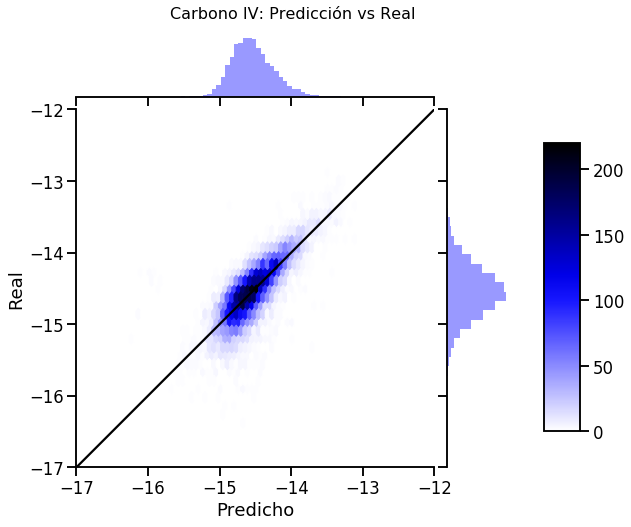

In [188]:
XC4 = quasarCompleta.drop('LOGF_CIV',axis=1)
yC4 = quasarCompleta.LOGF_CIV
XC4_train, XC4_test, YC4_train, YC4_test = train_test_split(XC4, quasarCompleta.LOGF_CIV, test_size=0.33, random_state=rs)
knn_clf=KNeighborsRegressor(10)
knn_clf.fit(XC4_train,YC4_train)
yC4_pred=knn_clf.predict(XC4_test)

cbC4 = sns.jointplot(x=yC4_pred,y=YC4_test, kind="hex",color="b",height=10)
sns.set_context("talk")
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
cbarC4_ax = cbC4.fig.add_axes([.85, .25, .05, .4])
cbC4.set_axis_labels("Predicho", "Real")
cbC4.ax_marg_x.set_xlim(-17,-12)
cbC4.ax_marg_y.set_ylim(-17,-12)
cbC4.title = "Carbono IV: Predicción vs Real"
plt.suptitle('Carbono IV: Predicción vs Real', y=0.84, fontsize = 16)
cbC4.ax_joint.plot([-17,-12],[-17,-12], 'k') 
plt.colorbar(cax=cbarC4_ax)

plt.show()



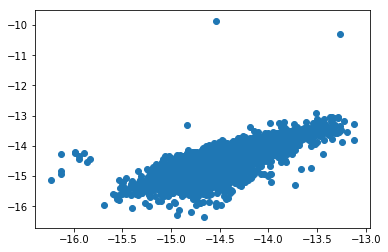

In [0]:
plt.scatter(yC4_pred, YC4_test)

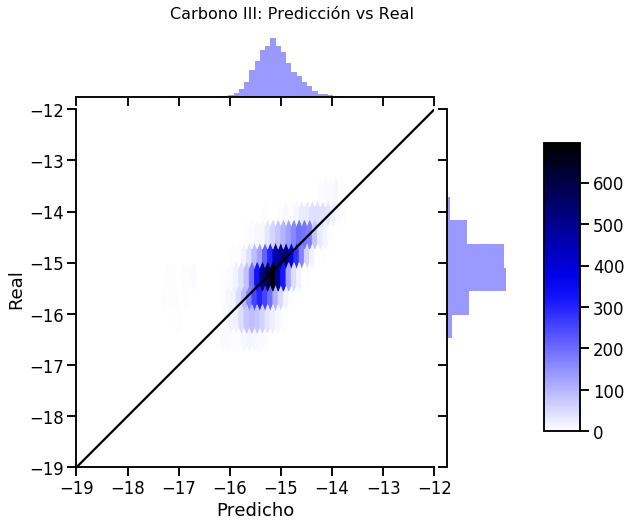

In [187]:
XC3 = quasarCompleta.drop('LOGF_CIII',axis=1)
yC3 = quasarCompleta.LOGF_CIII
XC3_train, XC3_test, YC3_train, YC3_test = train_test_split(XC3, quasarCompleta.LOGF_CIII, test_size=0.33, random_state=rs)
knn_clf=KNeighborsRegressor(10)
knn_clf.fit(XC3_train,YC3_train)
yC3_pred=knn_clf.predict(XC3_test)


cbC3 = sns.jointplot(x=yC3_pred,y=YC3_test, kind="hex",color="b",height=10)
sns.set_context("talk")
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
cbarC3_ax = cbC3.fig.add_axes([.85, .25, .05, .4])
cbC3.set_axis_labels("Predicho", "Real")
cbC3.ax_marg_x.set_xlim(-19,-12)
cbC3.ax_marg_y.set_ylim(-19,-12)
cbC3.title = "Carbono III: Predicción vs Real"
plt.suptitle('Carbono III: Predicción vs Real', y=0.84, fontsize = 16)
cbC3.ax_joint.plot([-19,-12],[-19,-12], 'k') 
plt.colorbar(cax=cbarC3_ax)

plt.show()

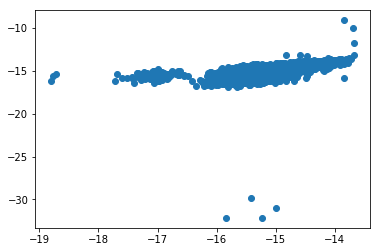

In [0]:
plt.scatter(yC3_pred, YC3_test)

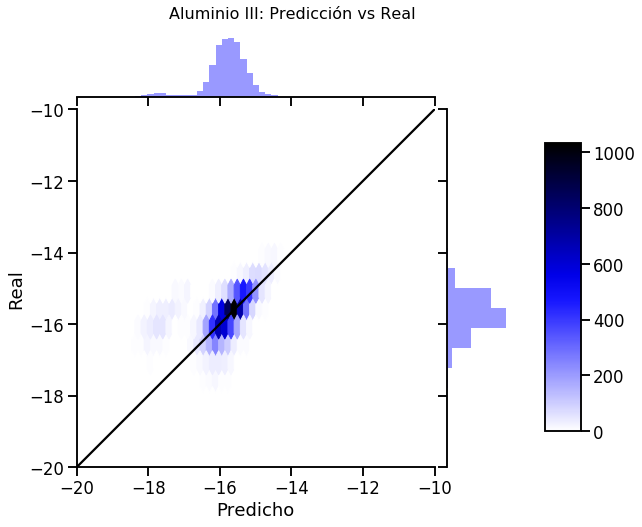

In [186]:
XAL = quasarCompleta.drop('LOGF_ALIII',axis=1)
yAL = quasarCompleta.LOGF_ALIII
XAL_train, XAL_test, YAL_train, YAL_test = train_test_split(XAL, quasarCompleta.LOGF_ALIII, test_size=0.33, random_state=rs)
knn_clf=KNeighborsRegressor(10)
knn_clf.fit(XAL_train,YAL_train)
yAL_pred=knn_clf.predict(XAL_test)

cbAL = sns.jointplot(x=yAL_pred,y=YAL_test, kind="hex",color="b",height=10)
sns.set_context("talk")
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
cbarAL_ax = cbAL.fig.add_axes([.85, .25, .05, .4])
cbAL.set_axis_labels("Predicho", "Real")
cbAL.ax_marg_x.set_xlim(-20,-10)
cbAL.ax_marg_y.set_ylim(-20,-10)
cbAL.title = "Aluminio III: Predicción vs Real"
plt.suptitle('Aluminio III: Predicción vs Real', y=0.84, fontsize = 16)
cbAL.ax_joint.plot([-20,-10],[-20,-10], 'k') 
plt.colorbar(cax=cbarAL_ax)

plt.show()

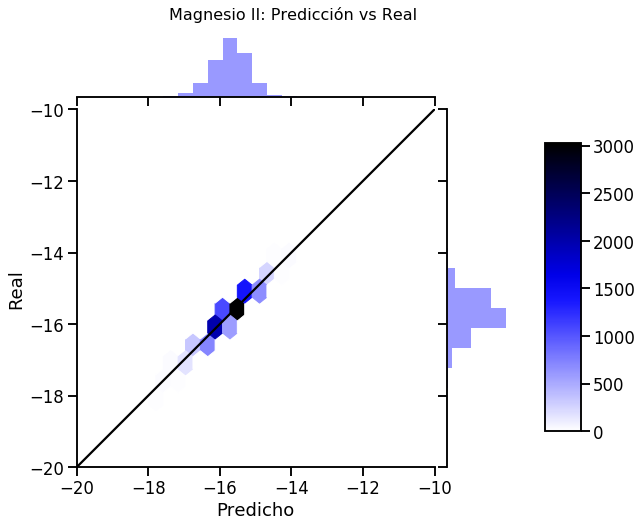

In [185]:
XAL = quasarCompleta.drop('LOGF_MGII',axis=1)
yAL = quasarCompleta.LOGF_MGII
XAL_train, XAL_test, YAL_train, YAL_test = train_test_split(XAL, quasarCompleta.LOGF_ALIII, test_size=0.33, random_state=rs)
knn_clf=KNeighborsRegressor(10)
knn_clf.fit(XAL_train,YAL_train)
yAL_pred=knn_clf.predict(XAL_test)
sns.set_context("talk")
cbAL = sns.jointplot(x=yAL_pred,y=YAL_test, kind="hex",color="b",height=10)
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
cbarAL_ax = cbAL.fig.add_axes([.85, .25, .05, .4])
cbAL.set_axis_labels("Predicho", "Real")
cbAL.ax_marg_x.set_xlim(-20,-10)
cbAL.ax_marg_y.set_ylim(-20,-10)
cbAL.title = "Aluminio III: Predicción vs Real"
plt.suptitle('Magnesio II: Predicción vs Real', y=0.84, fontsize = 16)
cbAL.ax_joint.plot([-20,-10],[-20,-10], 'k') 
plt.colorbar(cax=cbarAL_ax)

plt.show()

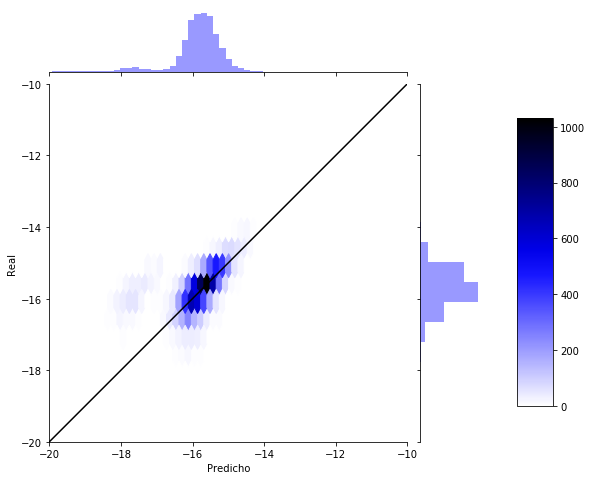

In [0]:
cbAL = sns.jointplot(x=yAL_pred,y=YAL_test, kind="hex",color="b",height=10)
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
cbarAL_ax = cbAL.fig.add_axes([.85, .25, .05, .4])
cbAL.set_axis_labels("Predicho", "Real")
cbAL.ax_marg_x.set_xlim(-20,-10)
cbAL.ax_marg_y.set_ylim(-20,-10)
cbAL.title = "Aluminio III: Predicción vs Real"
plt.suptitle('Aluminio III: Predicción vs Real', y=0.84, fontsize = 16)
cbAL.ax_joint.plot([-20,-10],[-20,-10], 'k') 
plt.colorbar(cax=cbarAL_ax)

plt.show()

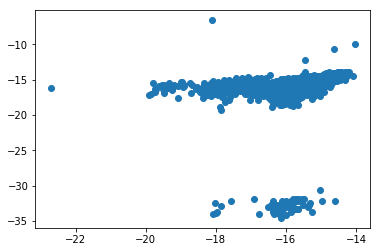

In [0]:
plt.scatter(yAL_pred, YAL_test)

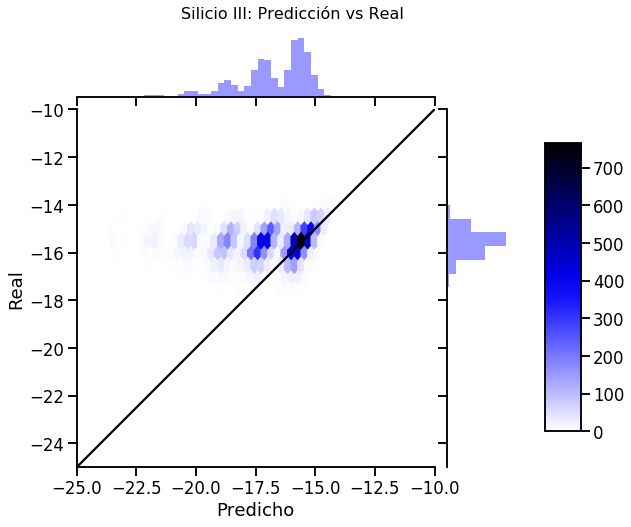

In [121]:
XSI = quasarCompleta.drop('LOGF_SIIII',axis=1)
ySI = quasarCompleta.LOGF_SIIII
XSI_train, XSI_test, YSI_train, YSI_test = train_test_split(XSI, quasarCompleta.LOGF_SIIII, test_size=0.33, random_state=rs)
knn_clf=KNeighborsRegressor(10)
knn_clf.fit(XSI_train,YSI_train)
ySI_pred=knn_clf.predict(XSI_test)

cbSI = sns.jointplot(x=ySI_pred,y=YSI_test, kind="hex",color="b",height=10)
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
cbarSI_ax = cbSI.fig.add_axes([.85, .25, .05, .4])
cbSI.set_axis_labels("Predicho", "Real")
cbSI.ax_marg_x.set_xlim(-25,-10)
cbSI.ax_marg_y.set_ylim(-25,-10)
cbSI.title = "Aluminio III: Predicción vs Real"
plt.suptitle('Silicio III: Predicción vs Real', y=0.84, fontsize = 16)
cbSI.ax_joint.plot([-35,-10],[-35,-10], 'k') 
plt.colorbar(cax=cbarSI_ax)

plt.show()

In [0]:
XSI = quasarCompleta.drop('LOGF_SIIII',axis=1)
ySI = quasarCompleta.LOGF_SIIII
XSI_train, XSI_test, YSI_train, YSI_test = train_test_split(XSI, quasarCompleta.LOGF_SIIII, test_size=0.33, random_state=rs)
knn_clf=KNeighborsRegressor(10)
knn_clf.fit(XSI_train,YSI_train)
ySI_pred=knn_clf.predict(XSI_test)

cbSI = sns.jointplot(x=ySI_pred,y=YSI_test, kind="hex",color="b",height=10)
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
cbarSI_ax = cbSI.fig.add_axes([.85, .25, .05, .4])
cbSI.set_axis_labels("Predicho", "Real")
cbSI.ax_marg_x.set_xlim(-25,-10)
cbSI.ax_marg_y.set_ylim(-25,-10)
cbSI.title = "Aluminio III: Predicción vs Real"
plt.suptitle('Silicio III: Predicción vs Real', y=0.84, fontsize = 16)
cbSI.ax_joint.plot([-35,-10],[-35,-10], 'k') 
plt.colorbar(cax=cbarSI_ax)

plt.show()

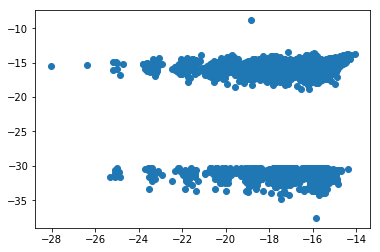

In [0]:
plt.scatter(ySI_pred, YSI_test)

Text(0.5, 1.0, 'Puntaje en función del número de vecinos')

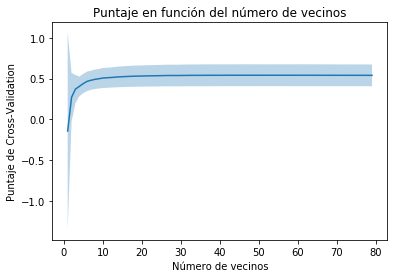

In [0]:
from sklearn.model_selection import cross_val_score

#r2
#explained_variance
neighbors = np.arange(1,80,1)
scores = np.zeros(np.shape(neighbors))
stds = np.zeros(np.shape(neighbors))


for s, n in enumerate(neighbors):
  clf = KNeighborsRegressor(n_neighbors=n)
  cv_scores = cross_val_score(clf, XC4_train, YC4_train, cv=10, scoring="r2")
  scores[s] = cv_scores.mean()
  stds[s] = cv_scores.std()
  
plt.fill_between(neighbors, scores-stds, scores+stds, alpha=0.3)
plt.plot(neighbors, scores)
plt.xlabel('Número de vecinos')
plt.ylabel('Puntaje de Cross-Validation')
plt.title('Puntaje en función del número de vecinos')

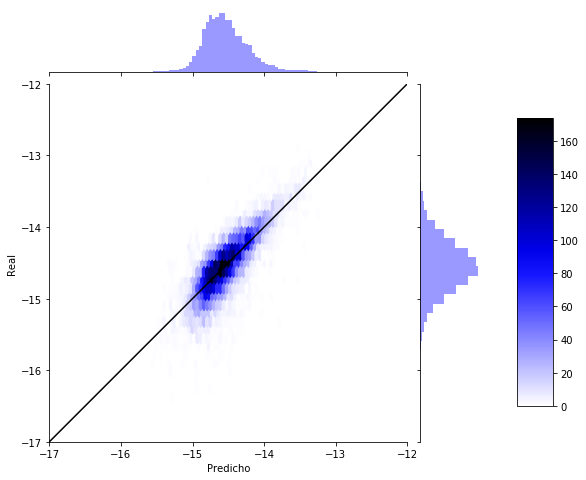

In [0]:
knnOptimo=KNeighborsRegressor(25)
knnOptimo.fit(XC4_train,YC4_train)
yC4_pred=knnOptimo.predict(XC4_test)

cbC4 = sns.jointplot(x=yC4_pred,y=YC4_test, kind="hex",color="b",height=10)
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
cbarC4_ax = cbC4.fig.add_axes([.85, .25, .05, .4])
cbC4.set_axis_labels("Predicho", "Real")
cbC4.ax_marg_x.set_xlim(-17,-12)
cbC4.ax_marg_y.set_ylim(-17,-12)
cbC4.title = "Carbono IV: Predicción vs Real"
cbC4.ax_joint.plot([-17,-12],[-17,-12], 'k') 
plt.colorbar(cax=cbarC4_ax)

plt.show()

In [0]:
quasarIncompleta= quasarIncompleta[quasarIncompleta.LOGF_CIII != 0] 
quasarIncompleta= quasarIncompleta[quasarIncompleta.LOGF_ALIII != 0] 
quasarIncompleta= quasarIncompleta[quasarIncompleta.LOGF_SIIII != 0] 
quasarIncompleta= quasarIncompleta[quasarIncompleta.LOGF_MGII != 0] 

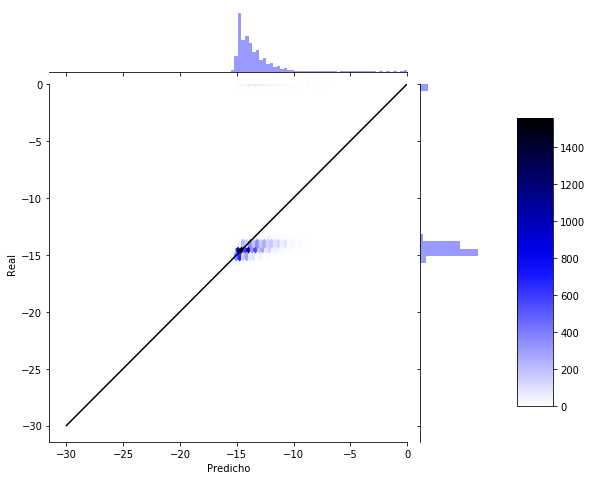

In [0]:
X = quasarIncompleta.drop('LOGF_CIV',axis=1)
y = quasarIncompleta.LOGF_CIV
X_train, X_test, Y_train, Y_test = train_test_split(X, quasarIncompleta.LOGF_CIV, test_size=0.33, random_state=rs)
knn=KNeighborsRegressor(25)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)

cb = sns.jointplot(x=y_pred,y=Y_test, kind="hex",color="b",height=10)
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
cbar_ax = cb.fig.add_axes([.85, .25, .05, .4])
cb.set_axis_labels("Predicho", "Real")
#cb.ax_marg_x.set_xlim(-17,-12)
#cb.ax_marg_y.set_ylim(-17,-12)
cb.title = "Carbono IV: Predicción vs Real"
cb.ax_joint.plot([-30,0],[-30,0], 'k') 
plt.colorbar(cax=cbar_ax)

plt.show()


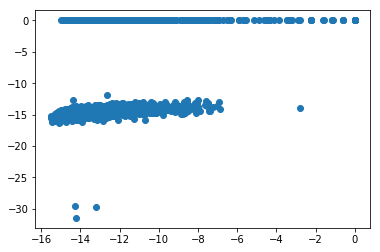

In [0]:
plt.scatter(y_pred, Y_test)